### Imports and Setups
import emoji (This module is used to remove emojis from text but the emojis are already stripped from the Sentiment140 dataset so it is not used in this case)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

### Loading Dataset
I chose Sentiment140 Tweet dataset becuase it contains 1.6 M labeled tweets, and is a good example to test machine learning skills on high amount of data.

In [ ]:
df = pd.read_csv("database//tweets.csv", names = ['sentiment', 'ids', 'date', 'flag', 'user', 'text'])
print(df.shape)
df.head()

(1600000, 6)


,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Data Visualization
0 is for negative and 4 is for positive

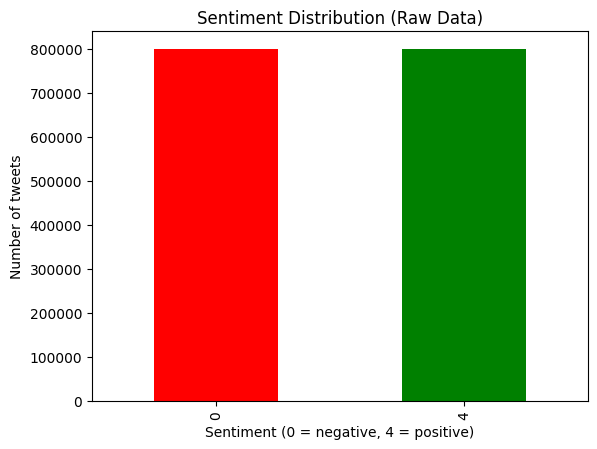

In [ ]:
df['sentiment'].value_counts().plot(kind = 'bar', color = ['red','green'])
plt.title("Sentiment Distribution (Raw Data)")
plt.xlabel("Sentiment (0 = negative, 4 = positive)")
plt.ylabel("Number of tweets")
plt.show()

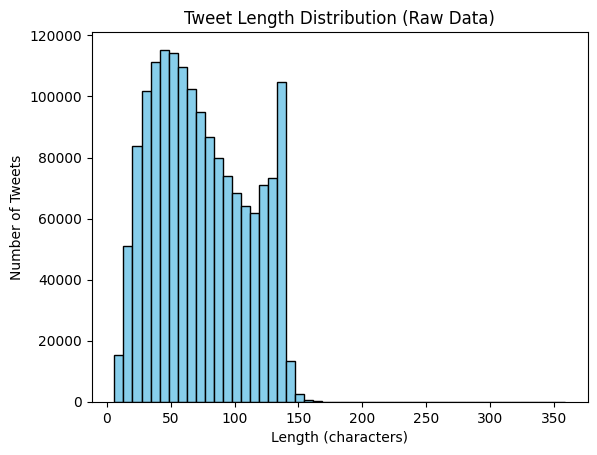

In [ ]:
df['tweet_length'] = df['text'].apply(len)

plt.hist(df['tweet_length'], bins = 50, color = 'skyblue', edgecolor = 'black')
plt.title("Tweet Length Distribution (Raw Data)")
plt.xlabel("Length (characters)")
plt.ylabel("Number of Tweets")
plt.show()

### Data Cleaning

In [ ]:
def cleaner(string):
    string = re.sub(r"http\S+|www\S+", "", string)
    string = re.sub(r"@\w+", "[USER]", string)
    string = re.sub(r"#", "", string)
    string = re.sub(r"\s+", " ", string)
    string = string.lower().strip()
    return string

df["processed_text"] = df["text"].apply(cleaner)
df[["text", "processed_text"]].head()

,text,processed_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[USER] - a that's a bummer. you shoulda got da...
1,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,@Kenichan I dived many times for the ball. Man...,[USER] i dived many times for the ball. manage...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....","[USER] no, it's not behaving at all. i'm mad. ..."


In [7]:
lemmatizer = WordNetLemmatizer()

def lemmatize(string):
    words = [lemmatizer.lemmatize(word) for word in string.split()]
    result = ' '.join(words)
    return result

df["lemmatized_text"] = df["processed_text"].apply(lemmatize)
df[["text", "lemmatized_text"]].head()

,text,lemmatized_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[USER] - a that's a bummer. you shoulda got da...
1,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,@Kenichan I dived many times for the ball. Man...,[USER] i dived many time for the ball. managed...
3,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire
4,"@nationwideclass no, it's not behaving at all....","[USER] no, it's not behaving at all. i'm mad. ..."


### Train Test Data Split
The data is split in train and test parts in ratio 9:1.

In [8]:
x = df["lemmatized_text"]
y = df["sentiment"].astype(int)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 10, stratify = y)
print("X Train: ", x_train.shape)
print("Y Train: ", y_train.shape)
print("X Test: ", x_test.shape)
print("Y Test: ", y_test.shape)

X Train:  (1440000,)
Y Train:  (1440000,)
X Test:  (160000,)
Y Test:  (160000,)


### Logistic Regression Model Training
This model has limitation that it doesn't understand sarcasm and contextual text due to use of TfidfVectorizer.

In [ ]:
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 20000, ngram_range = (1,2))
x_train_int = vectorizer.fit_transform(x_train)
x_test_int = vectorizer.transform(x_test)

In [ ]:
model = LogisticRegression(max_iter = 500, C = 0.5)
model.fit(x_train_int, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.5
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


### Evaluating Model
Changed model's accuracy by setting hyperparameter, number of iterations and max number of features for vectorizer resulting in the model's accuracy to 78.39% which is very accurate for such a big dataset.

In [12]:
y_test_pred = model.predict(x_test_int)

print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.78394375
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     80000
           4       0.77      0.81      0.79     80000

    accuracy                           0.78    160000
   macro avg       0.78      0.78      0.78    160000
weighted avg       0.78      0.78      0.78    160000

